# Simplicity and Depression - Clustering with K-Means 

### Objective:
To determine if there is a relationship between higher levels of black and white thinking and higher levels of self-reported 
depression in psychiatric patients hospitalized for depression.Also apply K means clustering and assign groups for model prediction

### Context:
It is common for people who tend to think of their reality as a series of black and white events to suffer from depression. 
Psybersquare, Inc. describes a few examples of this way of thinking by saying that those who suffer from this way of thinking 
think that, "If things aren't 'perfect,' then they must be "horrible." If your child isn't "brilliant" then he must be 'stupid.' 
If you're not 'fascinating' then you must be 'boring.'" This can be a difficult way to live since those suffering from this way 
of thinking may never feel that their reality is “good enough”. 

### Data Sources:
The data used for this study is from the Ginzberg data frame which is based on psychiatric patients hospitalized for depression. 
Data is from the book Applied Regression Analysis and Generalized Linear Models, Second Edition by Fox, J. (2008). The dataset 
includes three variables - simplicity (black and white thinking), fatalism, and depression. The data also includes these 
variables each adjusted by regression for other variables thought to influence depression. For the purposes of this study, we 
will use the non-adjusted values. Ginzberg Dataset on Depression display_output(Ginzberg, out_type) simplicity fatalism 
depression adjsimp adjfatal adjdep 

Here, "Black and white thinking" is referred as "Simplicity"

## Import Libraries

In [43]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [74]:
# Numerical libraries
import numpy as np   

# To handle data in form of rows and columns 
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# Ploting library
import matplotlib.pyplot as plt   

# Import seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

from scipy.stats import zscore

from mpl_toolkits.mplot3d import Axes3D

## Read Data

In [45]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Depression.csv")

In [46]:
mydata.head()

,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


### Remove id since it is redundant

In [47]:
mydata.drop('id', axis=1, inplace=True)

In [48]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
simplicity    82 non-null float64
fatalism      82 non-null float64
depression    82 non-null float64
adjsimp       82 non-null float64
adjfatal      82 non-null float64
adjdep        82 non-null float64
dtypes: float64(6)
memory usage: 3.9 KB


In [49]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
simplicity,82.0,1.000000,0.500000,0.25068,0.656282,0.882665,1.26940,2.85408
fatalism,82.0,1.000000,0.500001,-0.05837,0.563010,0.977270,1.39152,2.22003
depression,82.0,1.000001,0.500000,0.46953,0.566410,0.824750,1.37373,2.24565
adjsimp,82.0,1.000000,0.499999,0.23569,0.697958,0.968490,1.20179,2.94977
adjfatal,82.0,1.000000,0.500000,0.03012,0.731598,0.924290,1.29912,2.24931
adjdep,82.0,1.000000,0.500000,0.23454,0.596565,0.967845,1.26175,2.78763


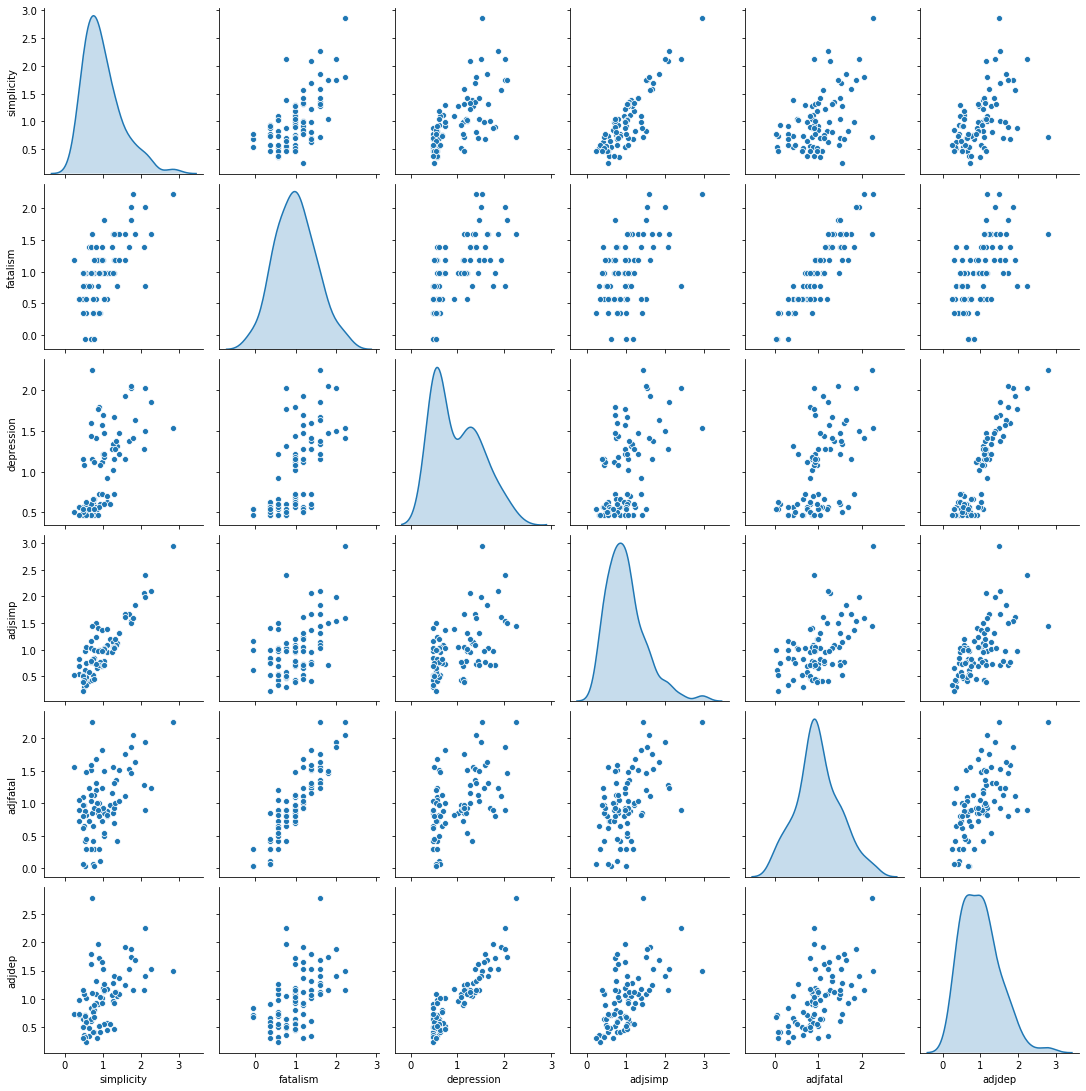

In [50]:
sns.pairplot(mydata, diag_kind='kde') 

#### Based on the kde plots, we can work with 2 or 3 clusters

### Scale the data

In [51]:
mydata_z = mydata.apply(zscore)

## Elbow Plot : Finding the Optimal Number of Clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

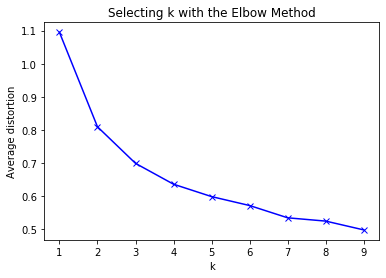

In [52]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata, model.cluster_centers_, 'euclidean'), axis=1)) / mydata
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Set the value of k=3 and Perform K-Means Clustering

In [53]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [54]:
kmeans.fit(mydata_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

### Cluster Centroids

In [55]:
centroids = kmeans.cluster_centers_

In [56]:
centroids

array([[-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

#### Calculate the Centroids for the Columns to Profile

In [57]:
centroid_df = pd.DataFrame(centroids, columns = list(mydata_z) )

In [58]:
print(centroid_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
1   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


### Above listed are the 3D Cluster centroids for every feature column.

#### Cluster 1 has the lowest values and cluster 2 has the highest values

In [59]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [60]:
# Joining the label dataframe with the data frame.
df_labeled = mydata.join(df_labels)

#### The groupby creates a grouped dataframe that needs to be converted back to dataframe. 

In [61]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  
df_analysis

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,1
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,1
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,1
3,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639,1
4,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518,1
...,...,...,...,...,...,...,...
77,1.04302,1.80577,1.47061,0.72117,1.50039,1.14913,0
78,1.79763,2.22003,1.40603,1.59752,2.05016,1.16443,2
79,2.11834,0.77014,2.01960,2.39515,0.88910,2.24452,2
80,1.42033,1.18439,1.47061,1.31493,1.04058,1.37153,0


In [62]:
df_labeled['labels'].value_counts()  

1    37
0    32
2    13
Name: labels, dtype: int64

In [63]:
#df_analysis = (df_labeled.groupby(['labels'], axis=0)).head(4177)  
#df_analysis[['depression', 'labels']]

In [64]:
prediction = kmeans.predict(mydata_z)

# Append the prediction 
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["depression", "GROUP"]]

Groups Assigned : 



,depression,GROUP
0,0.59870,1
1,0.72787,1
2,0.53411,1
3,0.56641,1
4,0.50182,1
...,...,...
77,1.47061,0
78,1.40603,2
79,2.01960,2
80,1.47061,0


### 3 clusters do not give a clear separation of high and low values of the features for different groups.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x162618B0>,
      dtype=object)

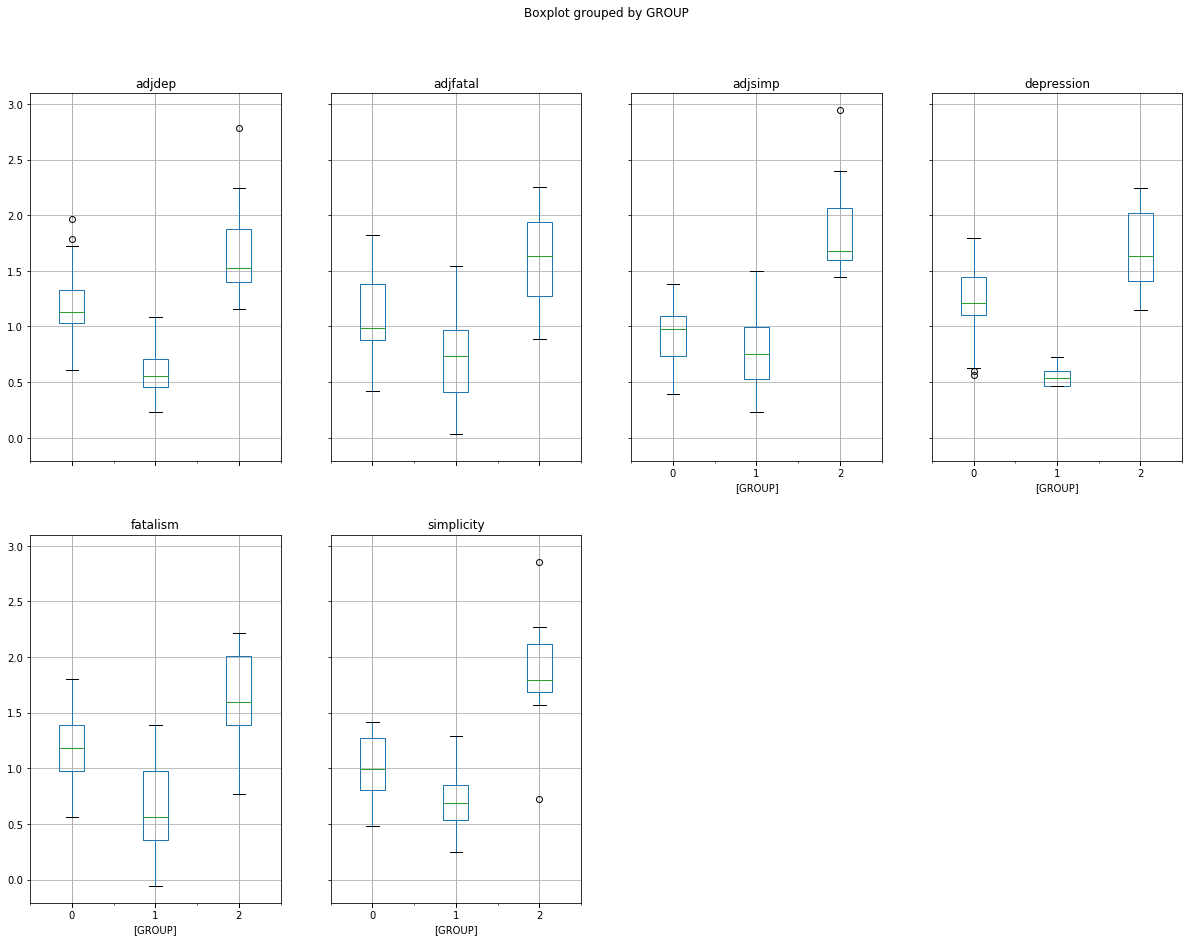

In [65]:
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

### If we check the depression levels, we observe that for the depression level 1.47061 (index no. 77) the label assigned is 0. Where as for the depression level of 1.40603 (index no. 78), the label assigned is 2. For such a small change of 0.07 in depression level there is a change in the label assigned by the clustering algorithm.

### This suggests that, probably the clustering with k=3 is not generating a good result. 


## 3D Plots of K-Means Clustering

Text(0.5, 0.92, '3D plot of KMeans Clustering')

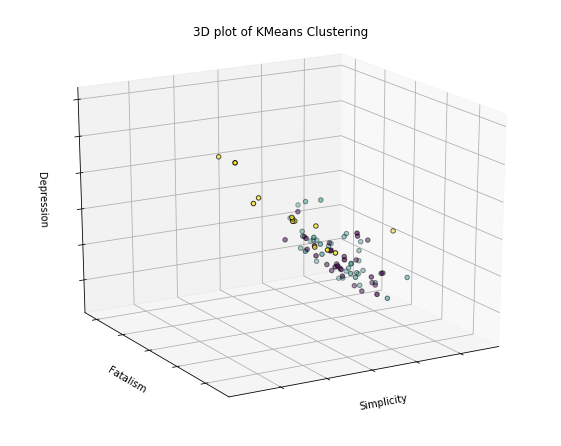

In [66]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(mydata_z)
labels = kmeans.labels_
ax.scatter(mydata_z.iloc[:, 0], mydata_z.iloc[:, 1], mydata_z.iloc[:, 3], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Simplicity')
ax.set_ylabel('Fatalism')
ax.set_zlabel('Depression')
ax.set_title('3D plot of KMeans Clustering')

## Let us try Clustering with K = 2

In [67]:
final_model = KMeans(2)
final_model.fit(mydata)
prediction = final_model.predict(mydata)

# Append the prediction 
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata[["depression", "GROUP"]]

Groups Assigned : 



,depression,GROUP
0,0.59870,0
1,0.72787,0
2,0.53411,0
3,0.56641,0
4,0.50182,0
...,...,...
77,1.47061,0
78,1.40603,1
79,2.01960,1
80,1.47061,0


In [68]:
mydata['GROUP'].value_counts()  

0    69
1    13
Name: GROUP, dtype: int64

### 2 clusters gives a clear separation of high and low values of the features for different groups.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1999A880>,
      dtype=object)

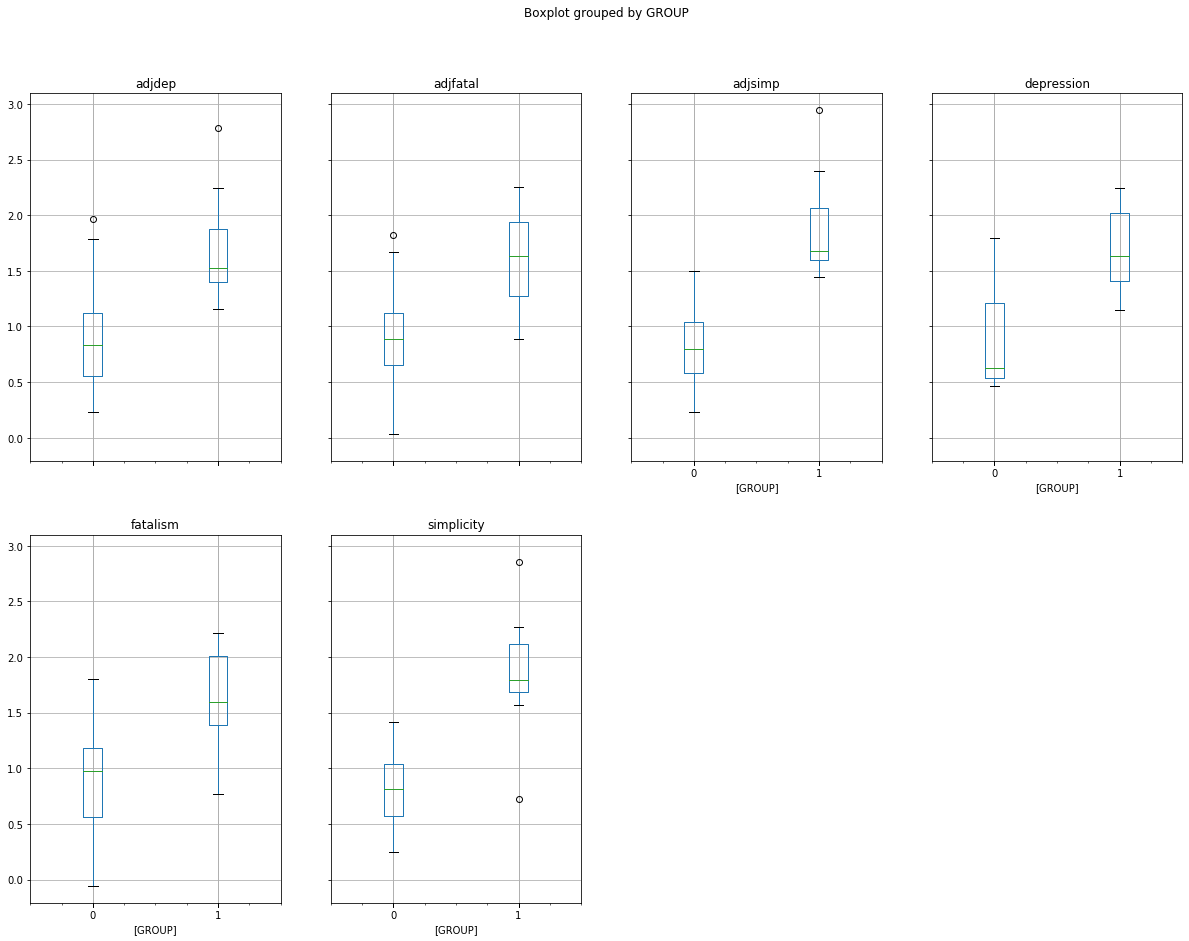

In [69]:
#plt.scatter(mydata["simplicity"][mydata.GROUP==0],
             #mydata["simplicity"][mydata.GROUP==1],c = colors, alpha=0.5)
    
mydata.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

Text(0.5, 1.0, '2D scatter plot of the data points and the cluster assignments')

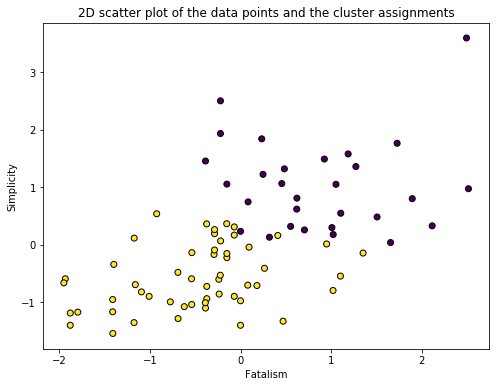

In [82]:
## 2D plots of clusters
fig = plt.figure(figsize=(8, 6))
final_model.fit(mydata_z)
labels = final_model.labels_

plt.scatter(mydata_z.iloc[:, 4], mydata_z.iloc[:, 5], c=labels.astype(np.float), edgecolor='k')
plt.xlabel('Fatalism')
plt.ylabel('Simplicity')
plt.title('2D scatter plot of the data points and the cluster assignments')


## Linear Dependency between Simplicity and Depression

### To determine if a relationship exists between black and white thinking (simplicity) and depression. 

In [70]:
mydata['simplicity'].corr(mydata['depression'])

0.6432667885861313

#### The correlation coefficient above indicates that the relationship between black and white thinking and depression can be considered moderate and positive. 

#### This means that we can see a clear relationship between black and white thinking and Depression, although the relationship is not perfect. 

#### The fact that the correlation coefficient is positive, indicates that higher levels of black and white thinking is associated with higher levels of depression.

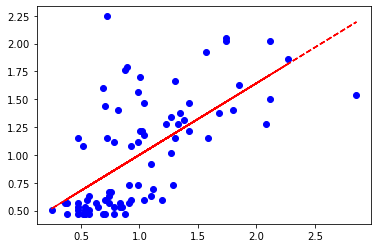

In [71]:
plt.plot(mydata['simplicity'], mydata['depression'], 'bo')
z = np.polyfit(mydata['simplicity'], mydata['depression'],1)
p = np.poly1d(z)
plt.plot(mydata['simplicity'], p(mydata['simplicity']), "r--")


#### As you can see from the above graphic, although the data does not form a perfectly straight line, it does fall in a way that indicates a positive relationship. 

#### Therefore, we can once again conclude that there is a relationship between black and white thinking and depression. 

#### It is important to note, however, that correlation does not in any way indicate causality and is merely indicative of a relationship between the two.